<a href="https://colab.research.google.com/github/vm20649/CE888/blob/main/drone_based_pile_burn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drone-based Pile Burn Image Classification for ’Fire-vs-No Fire’

### Loading Libraries

In [ ]:
import numpy as np
import cv2
import os
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras import optimizers
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB7
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Path_train = '../input/pile-burn-ic/Data_Fire/Training'

X = []
Y = []

for labels in os.listdir(Path_train):
    path = os.path.join(Path_train, labels)
    for images in os.listdir(path):
        path1 = os.path.join(path,images)
        img = cv2.imread(path1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (112,112), interpolation = cv2.INTER_AREA)
        X.append(img)
        Y.append(labels)

Text(0.5, 1.0, 'Fire')

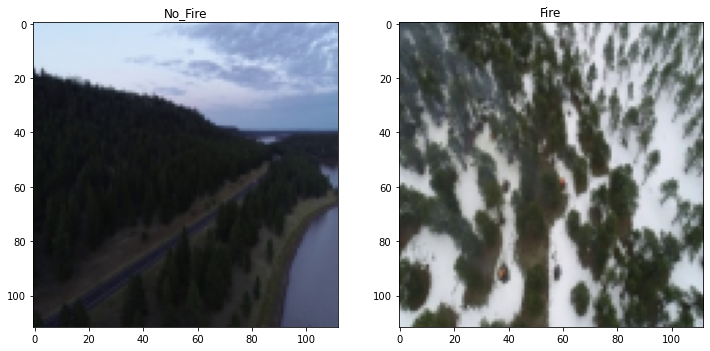

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(X[1])
plt.title(Y[1])
plt.subplot(1,2,2)
plt.imshow(X[20000])
plt.title(Y[20000])

In [ ]:
X = np.array(X)
X = X.reshape(X.shape[0],112,112,3)
label = LabelEncoder()
Y = label.fit_transform(Y)
Y = to_categorical(Y,2)
print(X.shape)
print(Y.shape)

(39375, 112, 112, 3)
(39375, 2)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
EfficientNetB7_ = EfficientNetB7(include_top = False, input_shape = (112,112,3), pooling='avg')
EfficientNetB7_.trainable = False
model = Sequential()
model.add(EfficientNetB7_)
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
checkpoint = ModelCheckpoint('./model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]
optimizers = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizers, metrics=["accuracy"])

history = model.fit(x = x_train, y = y_train, epochs=5, batch_size = 16, validation_data=(x_test,y_test), callbacks =callbacks, verbose = 1)

Epoch 1/5
1969/1969 [==============================] - 160s 73ms/step - loss: 0.1307 - accuracy: 0.9571 - val_loss: 0.0588 - val_accuracy: 0.9810

Epoch 00001: val_loss improved from inf to 0.05878, saving model to ./model.h5
Epoch 2/5
1969/1969 [==============================] - 139s 71ms/step - loss: 0.0471 - accuracy: 0.9842 - val_loss: 0.0149 - val_accuracy: 0.9958

Epoch 00002: val_loss improved from 0.05878 to 0.01491, saving model to ./model.h5
Epoch 3/5
1969/1969 [==============================] - 138s 70ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0140 - val_accuracy: 0.9956

Epoch 00003: val_loss improved from 0.01491 to 0.01402, saving model to ./model.h5
Epoch 4/5
1969/1969 [==============================] - 138s 70ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0113 - val_accuracy: 0.9958

Epoch 00004: val_loss improved from 0.01402 to 0.01132, saving model to ./model.h5
Epoch 5/5
1969/1969 [==============================] - 138s 70ms/step - loss: 0.0266

In [ ]:
from keras.models import load_model
model = load_model('./model.h5')

In [ ]:
y_test_ = np.argmax(y_test, axis=1)
y_pred_ = model.predict_classes(x_test)

print('Classification Report \n')
print(classification_report(y_test_, y_pred_, target_names = ['Fake','Real']))

Classification Report 

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4979
        Real       1.00      0.99      0.99      2896

    accuracy                           1.00      7875
   macro avg       1.00      1.00      1.00      7875
weighted avg       1.00      1.00      1.00      7875



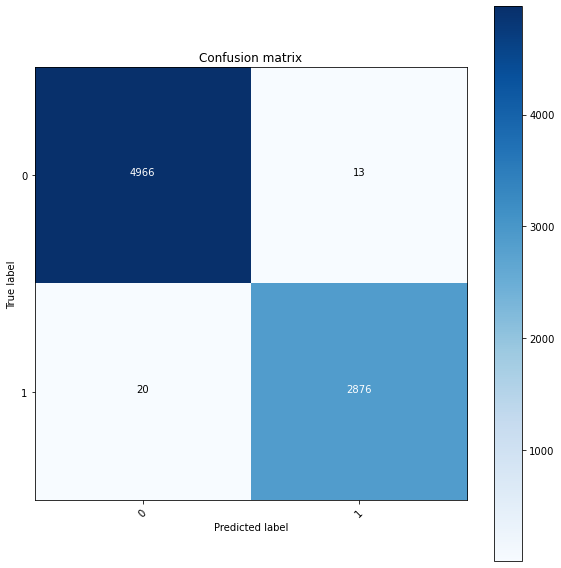

In [ ]:
import itertools
plt.figure(figsize=(8,8))

classes = 2
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(2))

# Testing

In [ ]:
Path_test = '../input/pile-burn-ic/Data_Fire/Test'

X = []
Y = []

for labels in os.listdir(Path_test):
    path = os.path.join(Path_test, labels)
    for images in os.listdir(path):
        path1 = os.path.join(path,images)
        img = cv2.imread(path1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (112,112), interpolation = cv2.INTER_AREA)
        X.append(img)
        Y.append(labels)
        
X = np.array(X)
X = X.reshape(X.shape[0],112,112,3)
label = LabelEncoder()
Y = label.fit_transform(Y)
Y = to_categorical(Y,2)
print(X.shape)
print(Y.shape)

Score = model.evaluate(X,Y)
print('Test Accuracy:', Score[1])

(8617, 112, 112, 3)
(8617, 2)
270/270 [==============================] - 27s 83ms/step - loss: 1.9287 - accuracy: 0.6225
Test Accuracy: 0.622490406036377
